
## COCO 2015 Image Captioning Task

https://cocodataset.org/

COCO Custom Dataset compatible with torch.utils.data.DataLoader.


In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [3]:
dataset_dir='../data/coco/'
data_type='train2014'

ann_file = os.path.join(dataset_dir,'annotations',f'captions_{data_type}.json')
coco=COCO(ann_file)

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


In [17]:
img_id2filename = {img_id: img_info['file_name'] for img_id, img_info in coco.imgs.items()}

captions = []
images = []

for _, caption_info in coco.anns.items():
    images.append(img_id2filename[caption_info['image_id']])
    captions.append(caption_info['caption'])

import pandas as pd
df = pd.DataFrame({"image":images, "caption":captions})
df.head()

,image,caption
0,COCO_train2014_000000318556.jpg,A very clean and well decorated empty bathroom
1,COCO_train2014_000000116100.jpg,A panoramic view of a kitchen and all of its a...
2,COCO_train2014_000000318556.jpg,A blue and white bathroom with butterfly theme...
3,COCO_train2014_000000116100.jpg,A panoramic photo of a kitchen and dining room
4,COCO_train2014_000000379340.jpg,A graffiti-ed stop sign across the street from...


In [18]:
some_id = coco.getImgIds()[5]
img_info = coco.loadImgs([some_id])[0]
img_info

{'license': 3,
 'file_name': 'COCO_train2014_000000547471.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000547471.jpg',
 'height': 640,
 'width': 383,
 'date_captured': '2013-11-14 16:48:45',
 'flickr_url': 'http://farm7.staticflickr.com/6146/5976678628_8776fd68b0_z.jpg',
 'id': 547471}

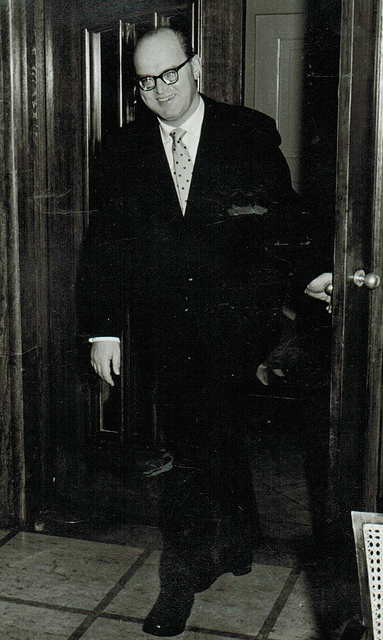

In [19]:
img = Image.open(os.path.join(dataset_dir,data_type,img_info['file_name']))
img

In [20]:
coco.showAnns(
    coco.loadAnns(
        coco.getAnnIds(imgIds=[some_id])
    )
)

A black and white image of a man in a suit wearing glasses walking through a door.
A nicely dressed man in a door way.
A man in glasses walks through an open door. 
 A man smiling and walking through a doorway.
A black and white photo of a man in suit and tie.


## Custom dataset with vocab and collation

In [21]:
path_source = "../src"
sys.path.append(path_source)

In [26]:
from datasets.ds_coco import CocoDataProvider
data_provider = CocoDataProvider(path_data = dataset_dir)

loading annotations into memory...
Done (t=0.45s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
Load vocab from cache...


In [27]:
# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(data_provider.loader['train'])

In [28]:
batch = next(data_iter)

In [29]:
images, targets, lengths = batch

In [30]:
targets

tensor([[   1,    4,   92,  ...,  158,   19,    2],
        [   1,    4,  170,  ...,   19,    2,    0],
        [   1,  959, 3309,  ...,    0,    0,    0],
        ...,
        [   1,    4,  326,  ...,    0,    0,    0],
        [   1,   48,  328,  ...,    0,    0,    0],
        [   1,  252,   36,  ...,    0,    0,    0]])

In [32]:
targets

tensor([[   1,    4,   92,  ...,  158,   19,    2],
        [   1,    4,  170,  ...,   19,    2,    0],
        [   1,  959, 3309,  ...,    0,    0,    0],
        ...,
        [   1,    4,  326,  ...,    0,    0,    0],
        [   1,   48,  328,  ...,    0,    0,    0],
        [   1,  252,   36,  ...,    0,    0,    0]])

In [33]:
data_iter = iter(data_provider.loader['val'])

In [34]:
batch = next(data_iter)

In [39]:
[" ".join(ref) for ref in batch[1][0]]

['this wire metal rack holds several pairs of shoes and sandals',
 'a dog sleeping on a show rack in the shoes .',
 'various slides and other footwear rest in a metal basket outdoors .',
 'a small dog is curled up on top of the shoes',
 'a shoe rack with some shoes and a dog sleeping on them']